In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import base64
import numpy as np
import re
import sys
import itertools
import seaborn as sns
import plotly.express as px
import altair as alt

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from tabulate import tabulate

In [170]:
tracks = pd.read_csv("Desktop/spotify.csv")

In [171]:
spotify_tracks = tracks.drop(tracks.columns[0], axis=1)
spotify_tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [172]:
spotify_tracks.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [173]:
summary = spotify_tracks.describe()
summary

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [174]:
# Get unique genres in the 'genre' column
unique_genres = spotify_tracks['track_genre'].unique()

# Print the unique genres
print(unique_genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [175]:
# Assign each genre a unique value
genre_values = {genre: idx for idx, genre in enumerate(unique_genres)}

# Add a new column 'genre_value' by mapping the track_genre to values
spotify_tracks['genre_value'] = spotify_tracks['track_genre'].map(genre_values)

print(spotify_tracks)

                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...  

In [176]:
spotify_tracks_pop = spotify_tracks.sort_values(by=['popularity'], ascending=False)
feature_name = 'tempo'
popularity_plot = spotify_tracks_pop[['artists','album_name', 'track_name', 'popularity', f'{feature_name}']]
popularity_plot

,artists,album_name,track_name,popularity,tempo
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,131.121
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,131.121
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,128.033
81210,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,128.040
89411,Manuel Turizo,La Bachata,La Bachata,98,124.980
...,...,...,...,...,...
95148,Edgar Joel;Anthony Colon,Era Salsa para Bailar,Hasta El Sol De Hoy,0,167.971
95145,Ray Barretto,Era Salsa para Bailar,Descarga La Moderna,0,113.211
68256,Jhayco,Reggeaton Imperdible,Sensual Bebé,0,97.066
68252,Jhayco;Bad Bunny,Bájale como 7500,CÓMO SE SIENTE - Remix,0,92.988


In [177]:
spotify_tracks['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

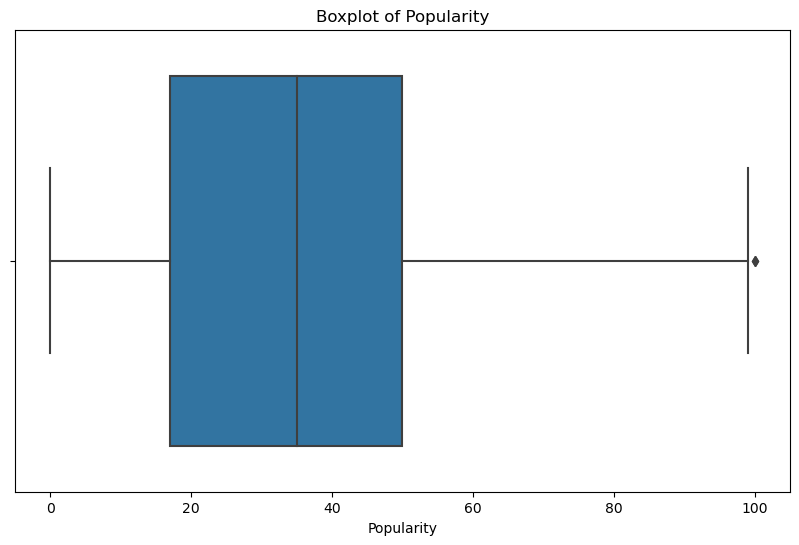

In [178]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.boxplot(x=spotify_tracks['popularity'])

plt.title('Boxplot of Popularity')
plt.xlabel('Popularity')

# Show the plot
plt.show()

In [179]:
explicit_songs = spotify_tracks.groupby('explicit')['popularity'].mean()
print(explicit_songs)

explicit
False    32.937891
True     36.454191
Name: popularity, dtype: float64


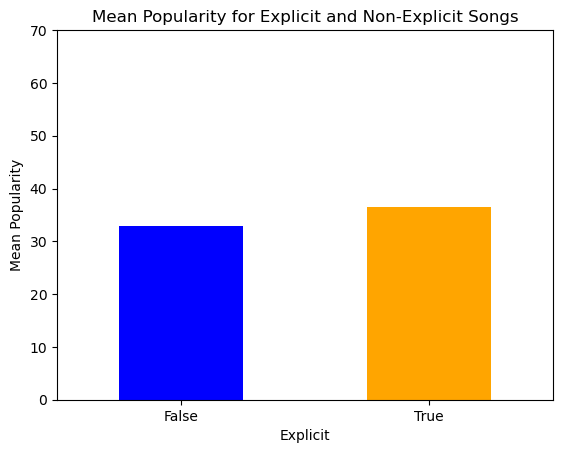

In [180]:
explicit_songs.plot(kind='bar', color=['blue', 'orange'])
plt.title('Mean Popularity for Explicit and Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Mean Popularity')
plt.ylim(0, 70)  # Adjust the y-axis limits as needed
plt.xticks([0, 1], ['False', 'True'], rotation=0)  # Assuming 0 represents False and 1 represents True
plt.show()

In [181]:
# Get the count of each artist
artist_counts = spotify_tracks['artists'].value_counts()
print(artist_counts)

# Get the most repeated artist
most_repeated_artist = artist_counts.idxmax()

# Print the result
print("Most Repeated Artist:", most_repeated_artist)

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64
Most Repeated Artist: The Beatles


In [182]:
# Extracting relevant audio features for clustering
audio_features = spotify_tracks[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','genre_value']]

# Standardize the data
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(audio_features)

In [183]:
pca = PCA()
pc=pca.fit_transform(audio_features_scaled)

Text(0.5, 1.0, 'PCA')

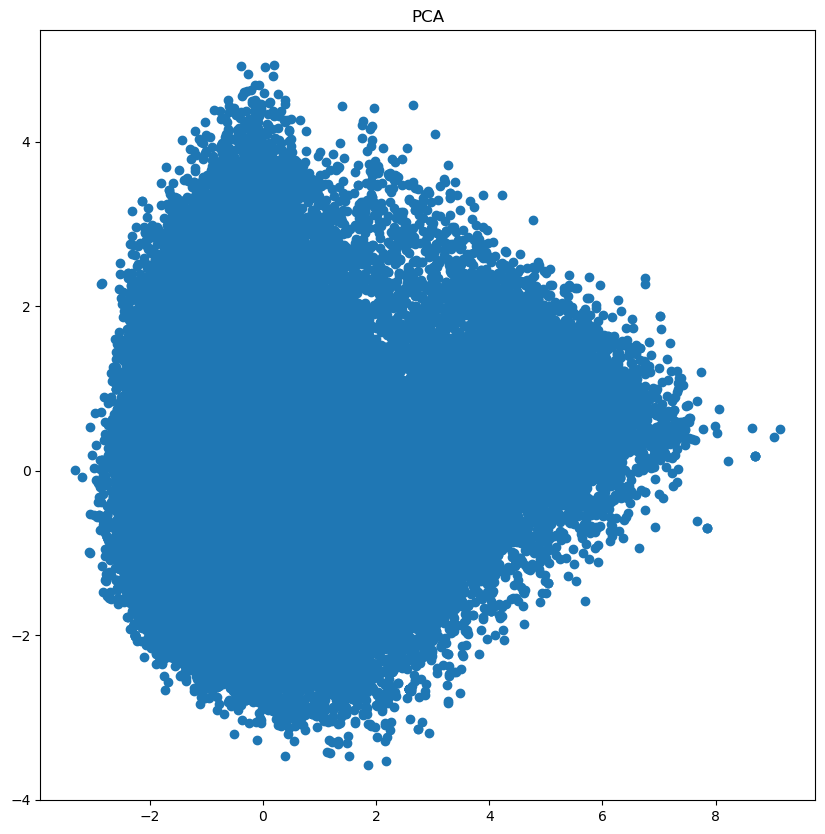

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(pc[:,0], pc[:,1])
ax.set_title("PCA")

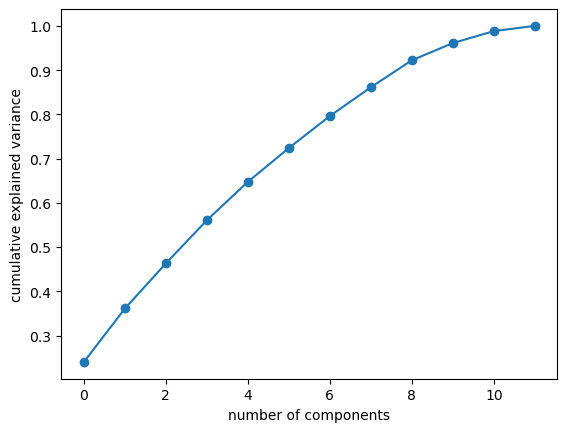

In [185]:
dims = PCA(n_components=audio_features_scaled.shape[1])
pca_dims = dims.fit(audio_features_scaled)
plt.plot(np.cumsum(pca_dims.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
sse = []
for k in range(1, 50):
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_features_scaled)
    sse.append(kmeans.inertia_)

1


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


11


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


13


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


16


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


17


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


18


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


19


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


20


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


21


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


22


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


23


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


24


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


25


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


26


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


27


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


28


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


29


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


30


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


31


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


32


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


33


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


34


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


35


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


36


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


37


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


38


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


39


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


40


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


41


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


42


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


43


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


44


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


45


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


46


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


47


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


48


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


49


/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


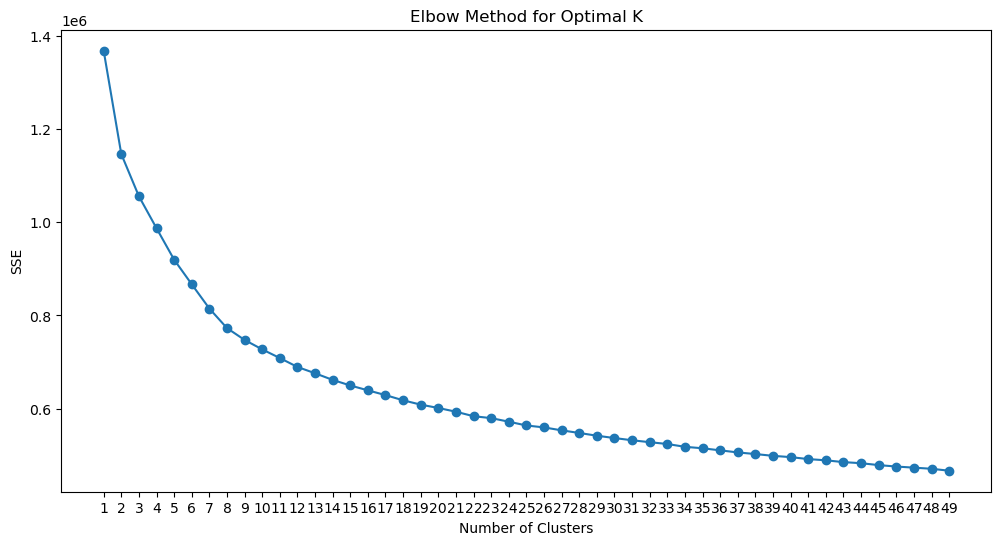

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), sse, marker='o')
plt.xticks(range(1, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

In [187]:
# Applying k-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
spotify_tracks['cluster'] = kmeans.fit_predict(audio_features_scaled)

# Displaying the clusters
spotify_tracks.head()

/Users/kenne/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre_value,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0,5
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0,5
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0,5
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0,5


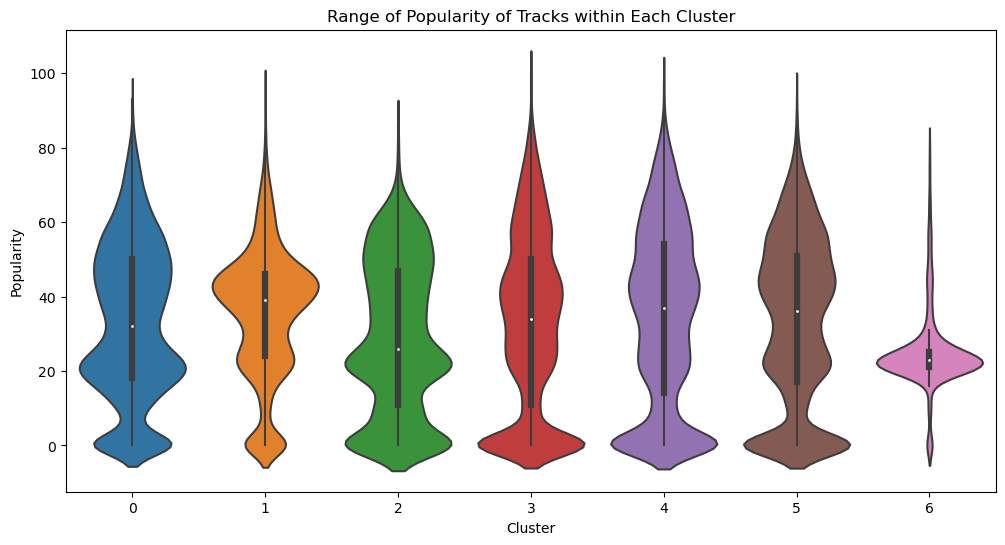

In [188]:
# Create the plot
plt.figure(figsize=(12, 6))

# Violin plot or box plot
sns.violinplot(
    data=spotify_tracks,
    x='cluster',  # Clusters on x-axis
    y='popularity',  # Popularity on y-axis
    palette='tab10',  # Cluster colors
    scale='width'  # Make violins proportional to data
)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.title('Range of Popularity of Tracks within Each Cluster')

# Show the plot
plt.show()

In [189]:
cluster_tracks = spotify_tracks.drop(spotify_tracks.columns[list(range(0,4)) + [19]], axis=1)
cluster_tracks

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_value,cluster
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,5
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,5
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,5
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,2
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,2
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,5
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,5


In [190]:
cluster_means = cluster_tracks.groupby('cluster').mean()

cluster_means.reset_index(inplace=True)

print(cluster_means)

   cluster  popularity    duration_ms  explicit  danceability    energy  \
0        0   33.278913  253051.511547  0.091545      0.442968  0.827158   
1        1   35.385614  239445.300172  0.057888      0.519829  0.754620   
2        2   28.742551  225316.039521  0.003241      0.365908  0.192875   
3        3   32.871563  214973.975519  0.101968      0.672710  0.727765   
4        4   34.566599  229383.722651  0.121457      0.666029  0.721997   
5        5   33.470299  216146.141364  0.030221      0.521891  0.363057   
6        6   25.146924  218300.911846  0.559229      0.574690  0.669655   

        key   loudness      mode  speechiness  acousticness  instrumentalness  \
0  5.114316  -5.826316  0.725504     0.084748      0.055233          0.259579   
1  5.358193  -7.071813  0.672804     0.085641      0.283445          0.080215   
2  4.895649 -20.560790  0.631841     0.051919      0.825250          0.800726   
3  4.975485  -6.450711  1.000000     0.083049      0.197583          0.0525

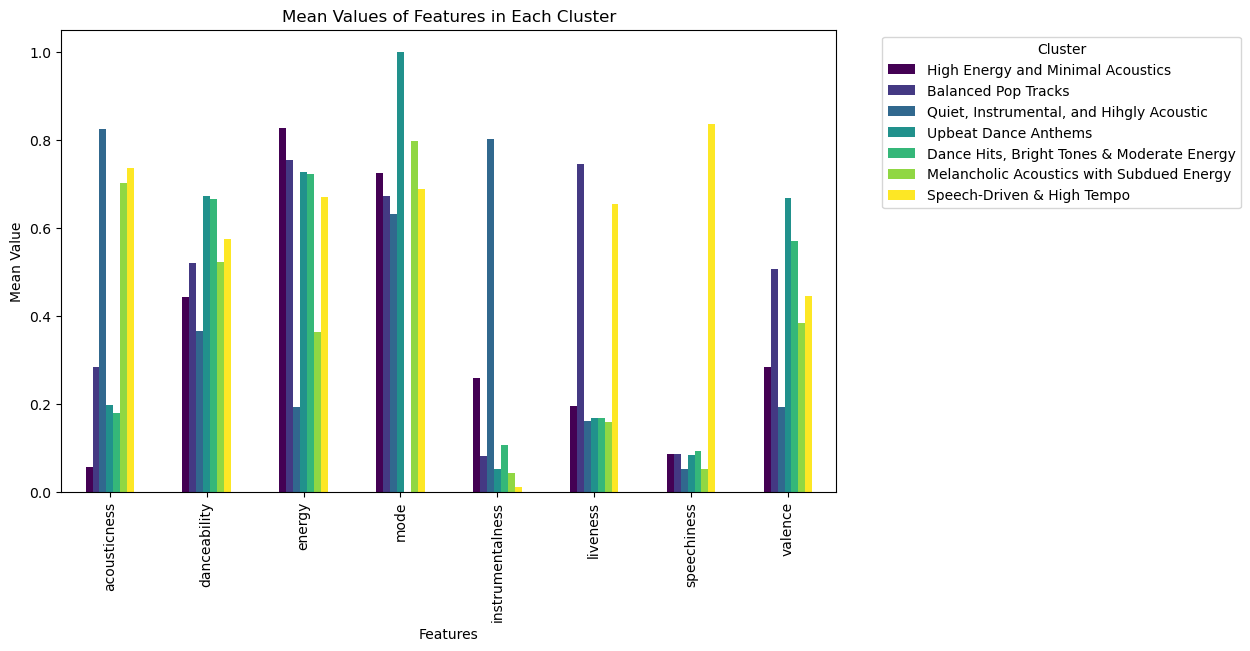

In [191]:
cluster_names = {
    0: 'High Energy and Minimal Acoustics',
    1: 'Balanced Pop Tracks',
    2: 'Quiet, Instrumental, and Hihgly Acoustic',
    3: 'Upbeat Dance Anthems',
    4: 'Dance Hits, Bright Tones & Moderate Energy',
    5: 'Melancholic Acoustics with Subdued Energy',
    6: 'Speech-Driven & High Tempo',
}

cluster_means['cluster_names'] = cluster_means.index.map(cluster_names)
cluster_means.set_index('cluster_names', inplace=True)

# Select features to display on the graph
selected_features = ['acousticness','danceability', 'energy', 'mode', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Plot the selected mean values using a bar plot
ax = cluster_means[selected_features].T.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Customize the plot
plt.title('Mean Values of Features in Each Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

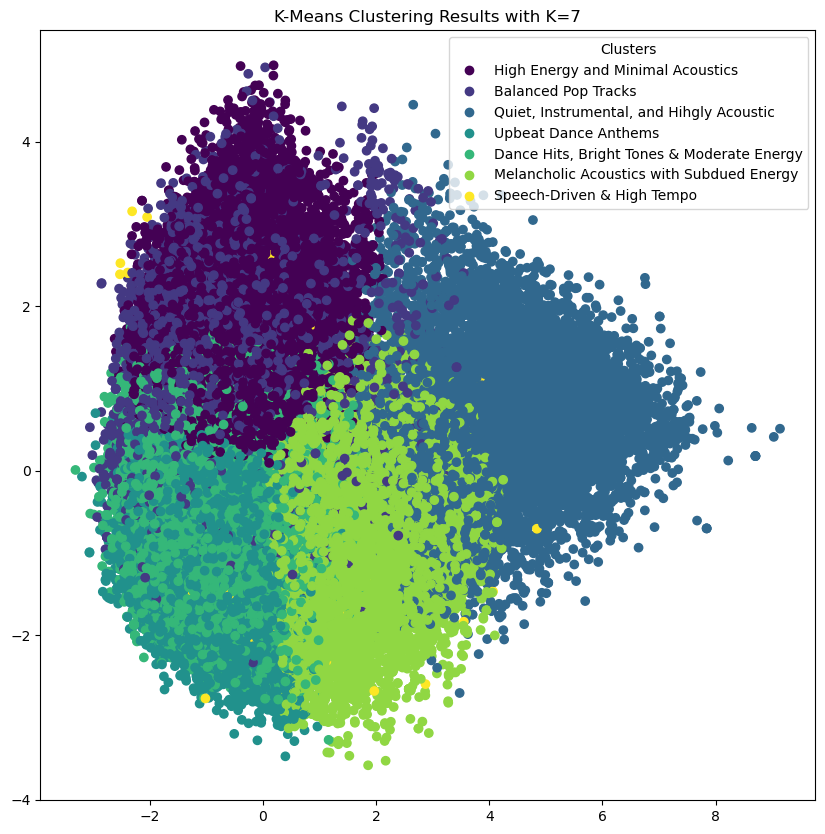

In [192]:
pca_dims = pca.fit_transform(audio_features_scaled)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
scatter = ax.scatter(pca_dims[:, 0], pca_dims[:, 1], c=spotify_tracks['cluster'])
ax.set_title("K-Means Clustering Results with K=7")

legend_labels = [cluster_names[i] for i in range(len(cluster_names))]

ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')
plt.show()

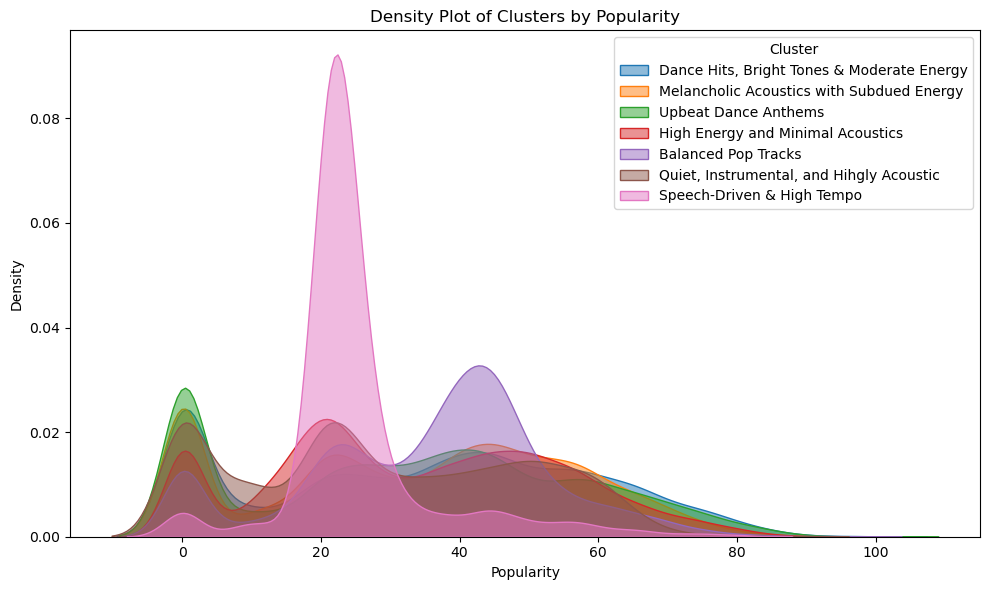

In [193]:
plt.figure(figsize=(10, 6))
for cluster in spotify_tracks['cluster'].unique():
    cluster_name = cluster_names.get(cluster, f'Cluster {cluster}')
    sns.kdeplot(
        data=spotify_tracks[spotify_tracks['cluster'] == cluster],
        x='popularity',
        fill=True,
        alpha=0.5,
        label=cluster_name
    )

plt.title("Density Plot of Clusters by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Density")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/625937776.py:9: UserWarning:

The figure layout has changed to tight



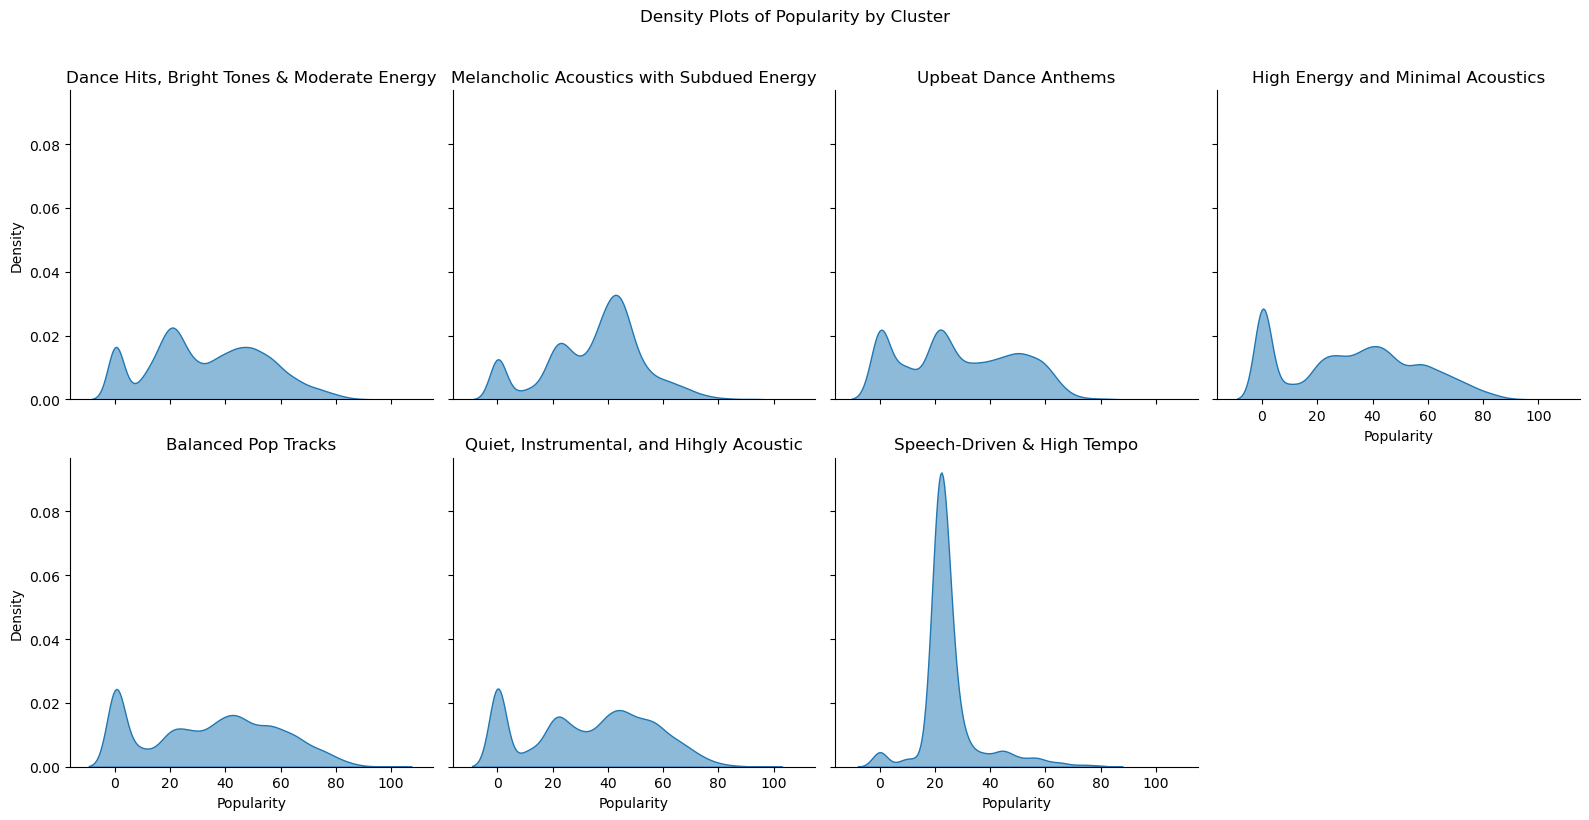

In [194]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "popularity", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Popularity", "Density")

plt.suptitle("Density Plots of Popularity by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/982438090.py:9: UserWarning:

The figure layout has changed to tight



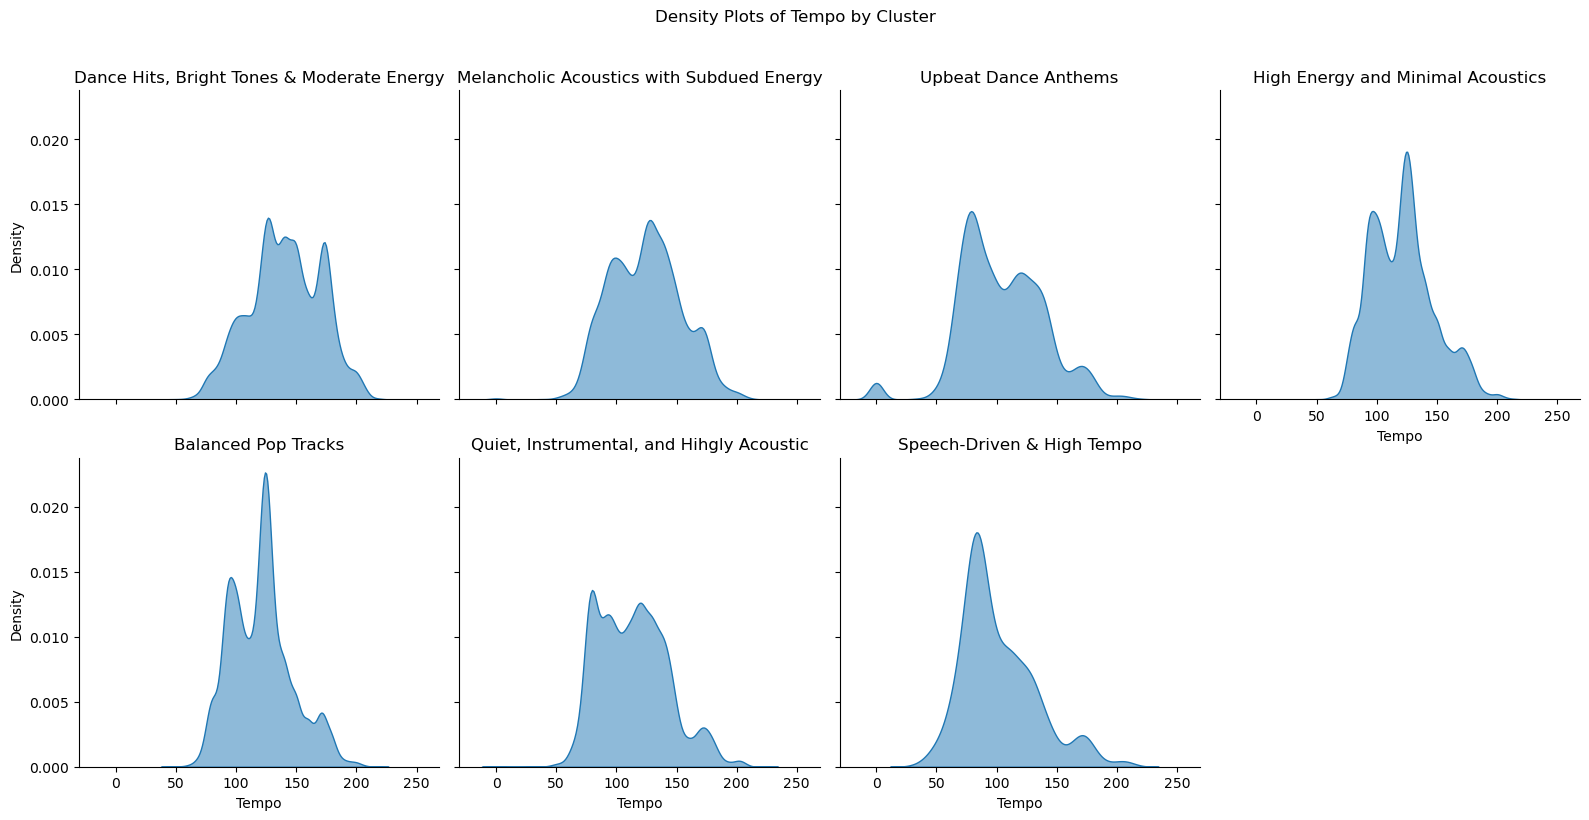

In [195]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "tempo", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Tempo", "Density")

plt.suptitle("Density Plots of Tempo by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/1969762024.py:9: UserWarning:

The figure layout has changed to tight



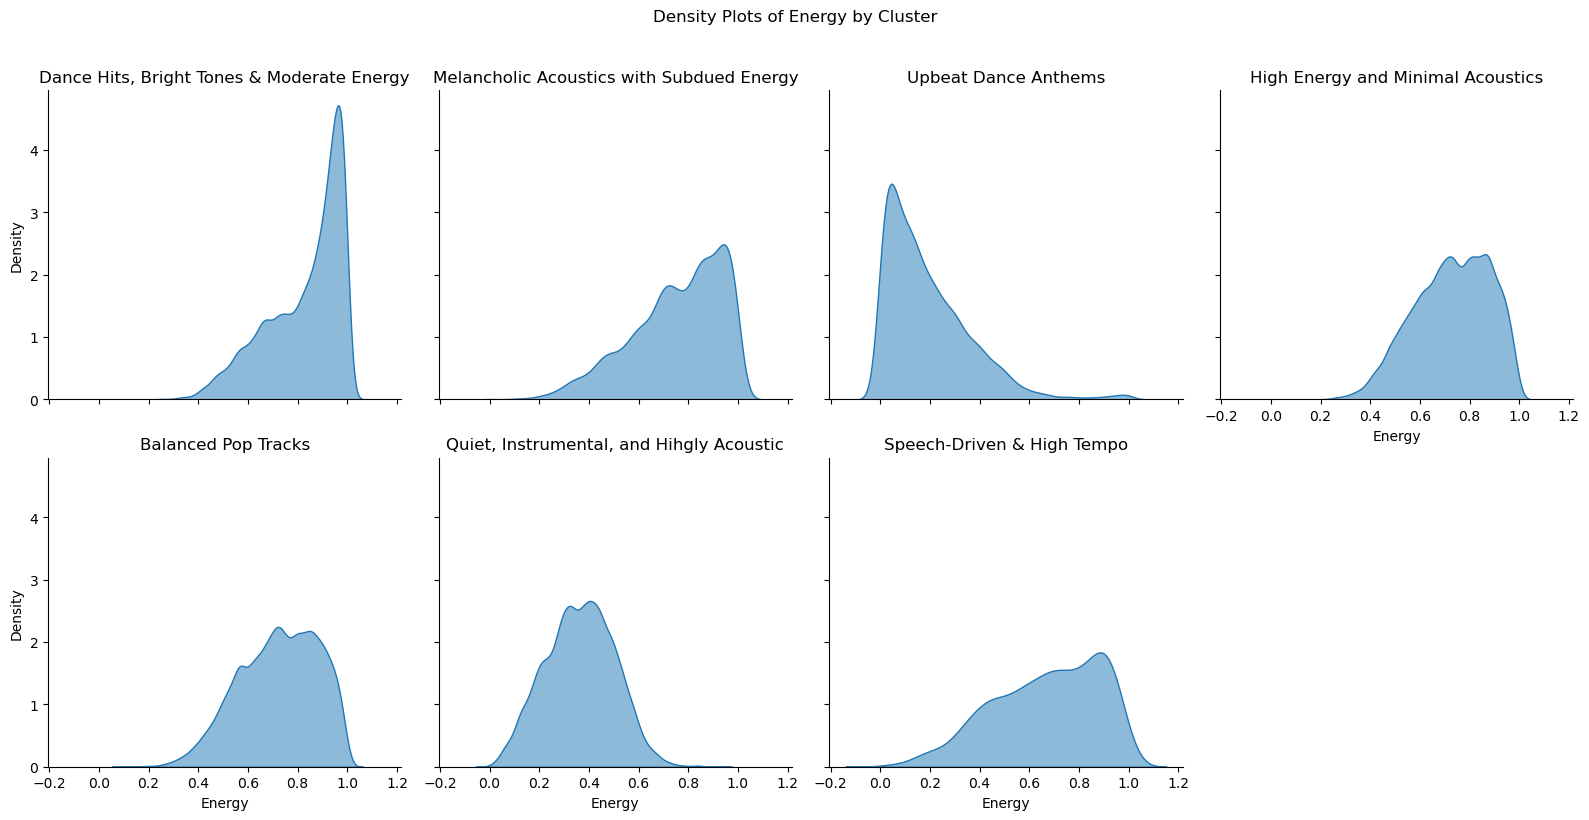

In [196]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "energy", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Energy", "Density")

plt.suptitle("Density Plots of Energy by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/1342882550.py:9: UserWarning:

The figure layout has changed to tight



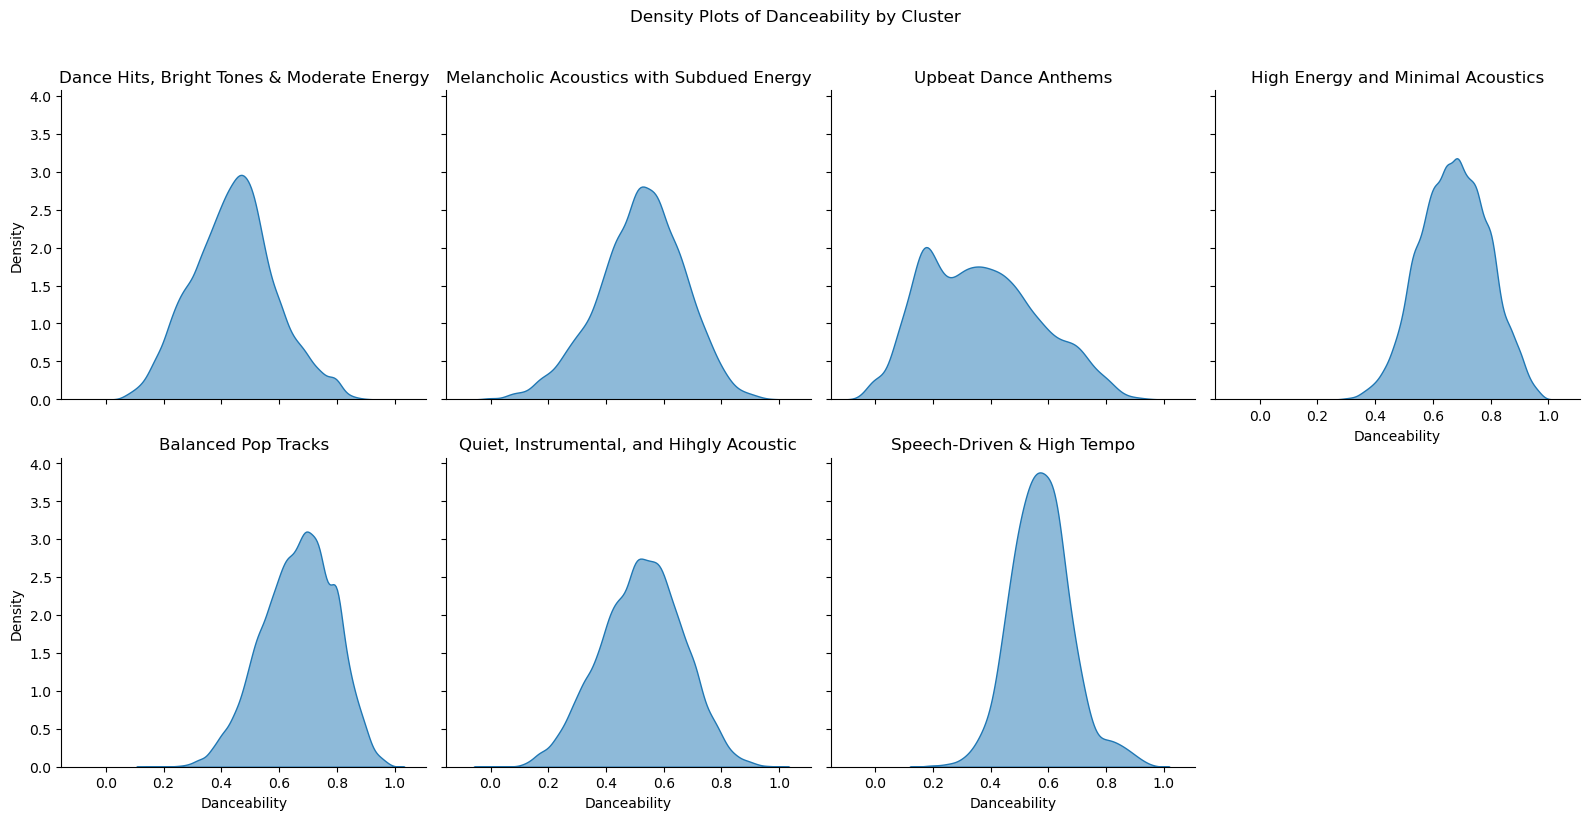

In [197]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "danceability", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Danceability", "Density")

plt.suptitle("Density Plots of Danceability by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/2780937680.py:9: UserWarning:

The figure layout has changed to tight



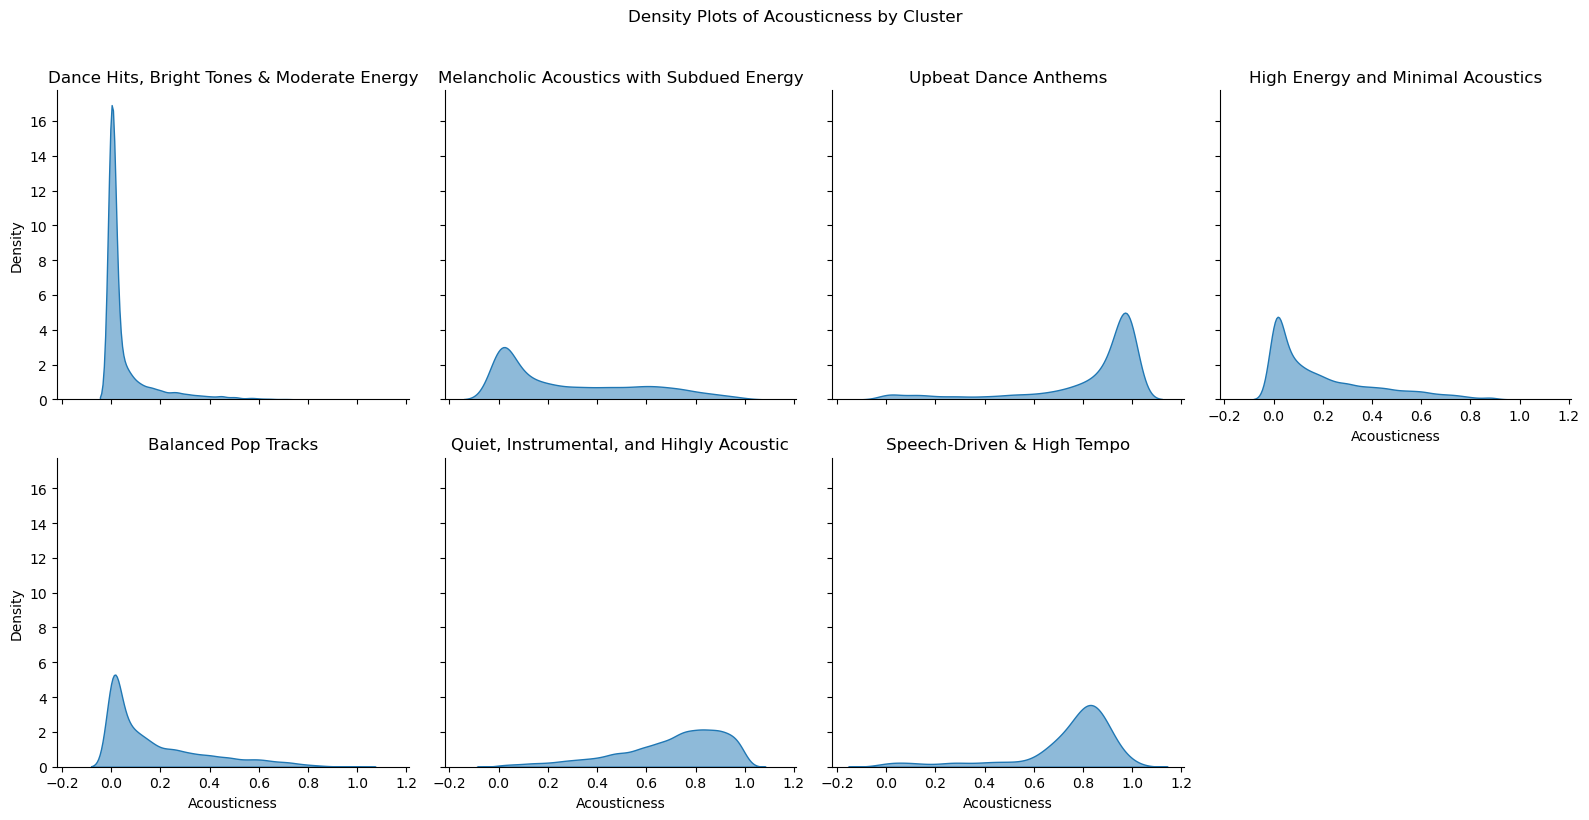

In [198]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "acousticness", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Acousticness", "Density")

plt.suptitle("Density Plots of Acousticness by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/3128226581.py:9: UserWarning:

The figure layout has changed to tight



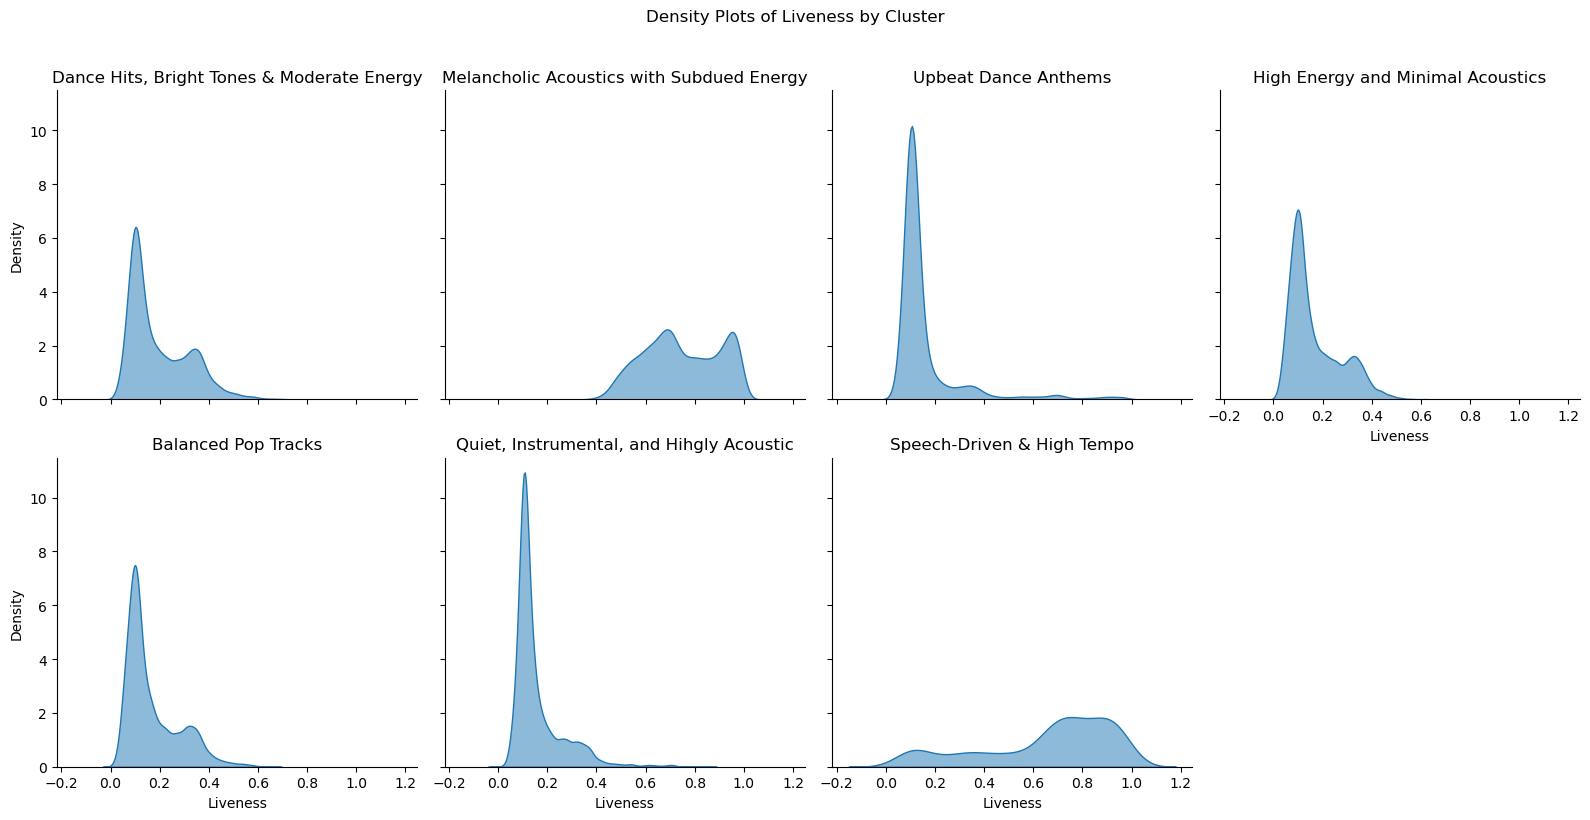

In [199]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "liveness", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Liveness", "Density")

plt.suptitle("Density Plots of Liveness by Cluster", y=1.02)
plt.tight_layout()
plt.show()

/Users/kenne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/var/folders/fx/yyqm1g756799mqvn5bb09wlr0000gn/T/ipykernel_50214/2351177931.py:9: UserWarning:

The figure layout has changed to tight



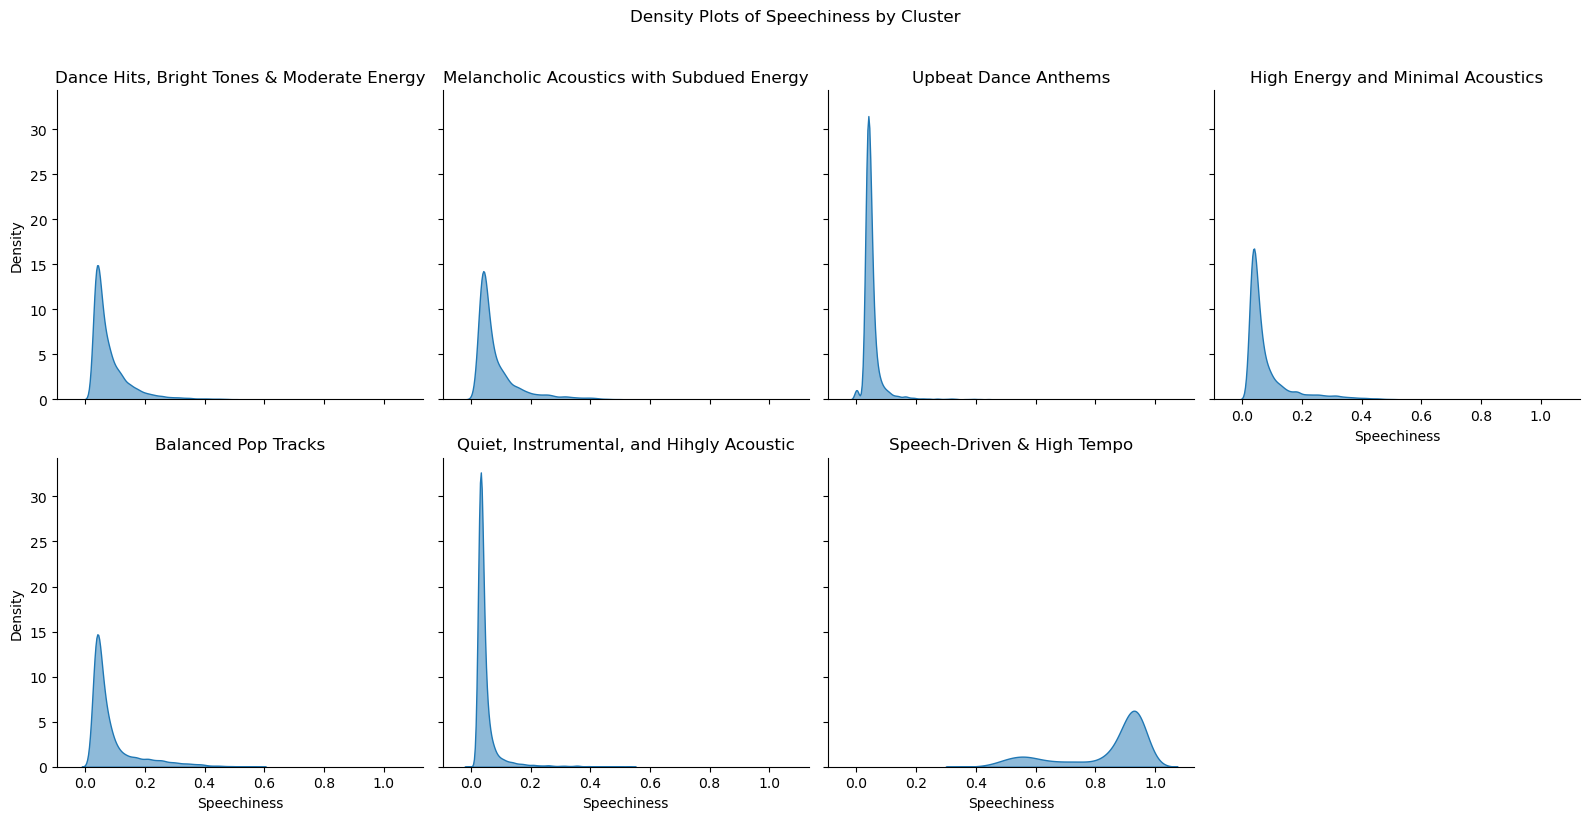

In [200]:
g = sns.FacetGrid(spotify_tracks, col="cluster", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "speechiness", fill=True, alpha=0.5)

for ax, cluster in zip(g.axes.flat, spotify_tracks['cluster'].unique()):
    ax.set_title(cluster_names[cluster])
g.set_axis_labels("Speechiness", "Density")

plt.suptitle("Density Plots of Speechiness by Cluster", y=1.02)
plt.tight_layout()
plt.show()

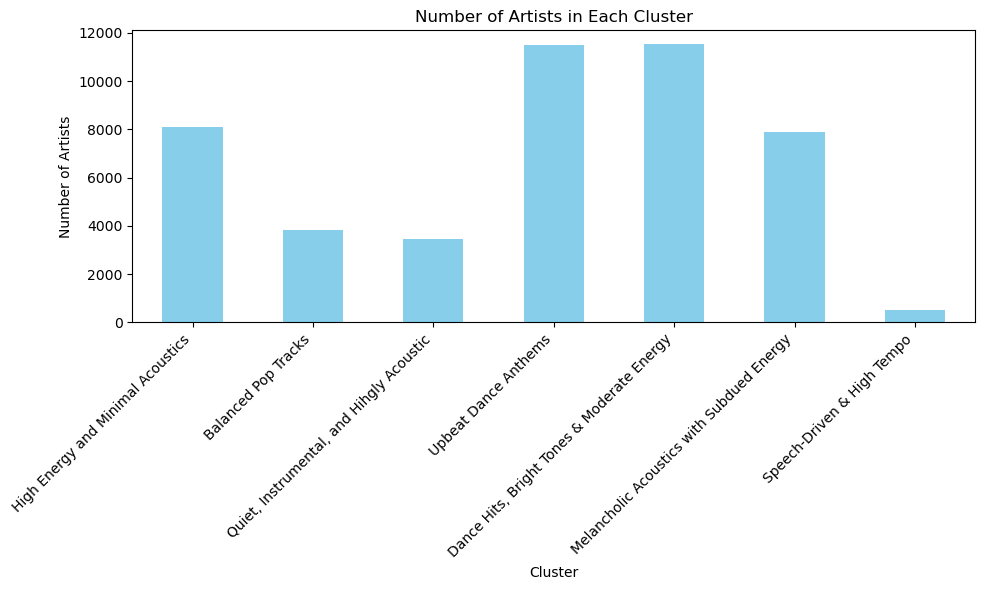

In [201]:
spotify_tracks['artists'] = spotify_tracks['artists'].str.split(';')

# Explode the 'artists' column so each artist gets its own row
exploded_artists = spotify_tracks.explode('artists')

# Count unique artists in each cluster
artist_counts = exploded_artists.groupby('cluster')['artists'].nunique()

artist_counts.index = artist_counts.index.map(cluster_names)

# Plotting the number of unique artists in each cluster
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title("Number of Artists in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Artists")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


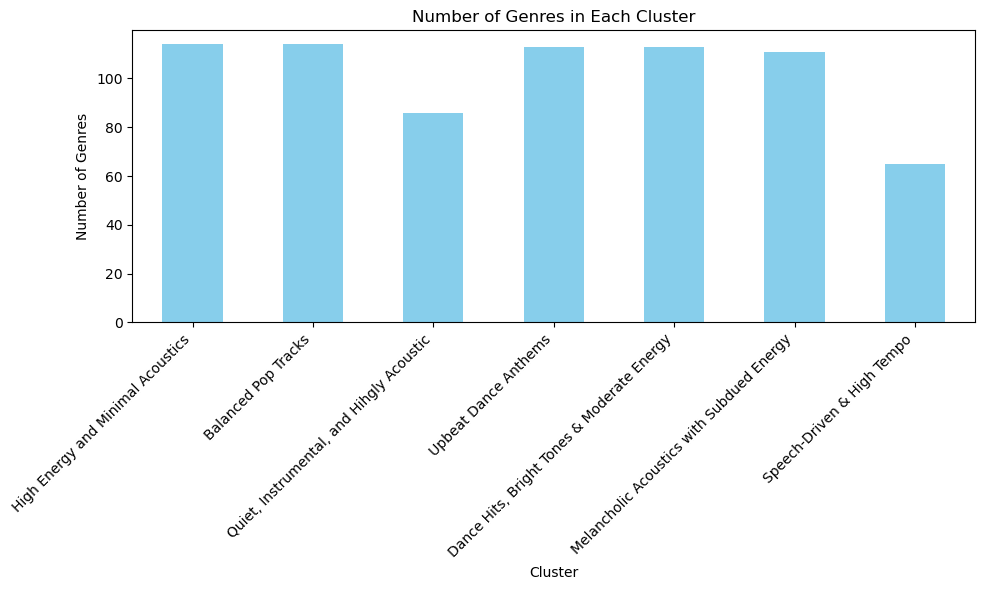

In [206]:
# Count unique artists in each cluster
genre_counts = spotify_tracks.groupby('cluster')['track_genre'].nunique()

genre_clusters = genre_counts.rename(index=cluster_names)

# Plotting the number of unique artists in each cluster
plt.figure(figsize=(10, 6))
genre_clusters.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title("Number of Genres in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Genres")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()